In [1]:
import numpy as np
import pandas as pd

from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("RECUENTO con clases.csv", sep=";", index_col=0, encoding="utf-8", usecols=["Código de muestra", "Régimen de alimentación"]).dropna()

In [3]:
df.head()

,Régimen de alimentación
Código de muestra,
B001,Bellota
B002,Bellota
B003,Bellota
B004,Bellota
B005,Bellota


In [4]:
img_labels = shuffle(df["Régimen de alimentación"].apply(lambda x: int(x == "Bellota"))).to_dict()

In [5]:
import math
def transform_df(dataframe: pd.DataFrame) -> pd.DataFrame:
    def transform_element(element: float) -> float:
        if element < -20:
            return -20 - math.log2(-element)

        if element > 125:
            return 125 + math.log2(element)
        
        return element
    return dataframe.apply(lambda r: r.apply(transform_element))

In [ ]:
pd.read_csv()

In [8]:
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier

items = list(img_labels.items())

classifiers = dict(
    pa1_identity=PassiveAggressiveClassifier(n_jobs=-1),
    pa1_onlyTransform=PassiveAggressiveClassifier(n_jobs=-1),
    pa1_transformAndFilter=PassiveAggressiveClassifier(n_jobs=-1),
    pa1_onlyFilter=PassiveAggressiveClassifier(n_jobs=-1),

    pa2_identity=PassiveAggressiveClassifier(n_jobs=-1, loss="squared_hinge"),
    pa2_onlyTransform=PassiveAggressiveClassifier(n_jobs=-1, loss="squared_hinge"),
    pa2_transformAndFilter=PassiveAggressiveClassifier(n_jobs=-1, loss="squared_hinge"),
    pa2_onlyFilter=PassiveAggressiveClassifier(n_jobs=-1, loss="squared_hinge"),

    svm_identity=SGDClassifier(),
    svm_onlyTransform=SGDClassifier(),
    svm_transformAndFilter=SGDClassifier(),
    svm_onlyFilter=SGDClassifier(),

    lr_identity=SGDClassifier(loss="log"),
    lr_onlyTransform=SGDClassifier(loss="log"),
    lr_transformAndFilter=SGDClassifier(loss="log"),
    lr_onlyFilter=SGDClassifier(loss="log"),
)





In [11]:
mapper_funcs = dict((("identity", lambda x: x), ("onlyTransform", transform_df),
                ("transformAndFilter", lambda x: transform_df(x.iloc[:, 1000:])), ("onlyFilter", lambda x: x.iloc[:, 1000:])))

In [21]:
import joblib


for key, value in items[314:800]:
    if i % 100 == 0 and i > 0:
        joblib.dump(classifiers, f"model{i}.joblib", 5)
    if i % 25 == 0:
        print(i)
    i +  = 1
    
    try:
        with open(f'images/{key}.csv') as file:
            X = pd.read_csv(file, sep=";", index_col=0)
    except FileNotFoundError:
        continue
    y = np.array([value])

    for classifier_name, classifier in classifiers.items():
        func = mapper_funcs[classifier_name.split("_")[1]]
        classifier.partial_fit(func(X).to_numpy().reshape(1, -1), y, classes=(0, 1))

325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800


In [ ]:
key, value = items[800]
try:
    with open(f'images/{key}.csv') as file:
        X = pd.read_csv(file, sep=";", index_col=0)
except FileNotFoundError:
    ...
y = np.array([value])

for classifier_name, classifier in classifiers.items():
    func = mapper_funcs[classifier_name.split("_")[1]]
    classifier.partial_fit(func(X).to_numpy().reshape(1, -1), y, classes=(0, 1))

joblib.dump(classifiers, f"model800.joblib", 5)

In [15]:
import boto3

In [27]:
i = 0
for key, value in items[800:]:
    if i % 25 == 0:
        print(i)
    i += 1
    
    try:
        with open(f'images/{key}.csv') as file:
            X = pd.read_csv(file, sep=";", index_col=0)
    except FileNotFoundError:
        continue
    y = np.array([value])

    for classifier_name, classifier in classifiers.items():
        func = mapper_funcs[classifier_name.split("_")[1]]
        classifier_scores[classifier_name].append(classifier.predict(func(X).to_numpy().reshape(1, -1))[0] == value)

0
25
50
75
100
125
150
175


In [29]:
for key, value in classifier_scores.items():
    print(key, np.mean(value))

pa1_identity 0.4835164835164835
pa1_onlyTransform 0.6648351648351648
pa1_transformAndFilter 0.7417582417582418
pa1_onlyFilter 0.5659340659340659
pa2_identity 0.4835164835164835
pa2_onlyTransform 0.6648351648351648
pa2_transformAndFilter 0.7417582417582418
pa2_onlyFilter 0.5659340659340659
svm_identity 0.4945054945054945
svm_onlyTransform 0.5494505494505495
svm_transformAndFilter 0.7692307692307693
svm_onlyFilter 0.4835164835164835
lr_identity 0.46153846153846156
lr_onlyTransform 0.8186813186813187
lr_transformAndFilter 0.8076923076923077
lr_onlyFilter 0.5


In [7]:
import joblib

In [5]:
items = list(img_labels.items())

In [26]:
mapper_funcs = dict((("identity", lambda x: x), ("onlyTransform", transform_df),
                ("transformAndFilter", lambda x: transform_df(x.iloc[:, 1000:])), ("onlyFilter", lambda x: x.iloc[:, 1000:])))


In [28]:
joblib.dump(classifier_scores, "results.joblib")

['results.joblib']

In [8]:
classifiers = joblib.load("model800.joblib")

C:\Users\david\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator PassiveAggressiveClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\david\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SGDClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
classifier_scores = joblib.load("results.joblib")
classifier_scores

{'pa1_identity': [(0, 0),
  (1, 1),
  (0, 0),
  (1, 1),
  (0, 0),
  (1, 1),
  (1, 1),
  (1, 0),
  (1, 1),
  (1, 1),
  (0, 0),
  (1, 0),
  (0, 0),
  (1, 0),
  (1, 1),
  (0, 0),
  (1, 1),
  (0, 1),
  (1, 1),
  (1, 0),
  (1, 0),
  (1, 1),
  (0, 1),
  (1, 1),
  (0, 0),
  (1, 1),
  (1, 1),
  (1, 0),
  (1, 1),
  (0, 1),
  (0, 0),
  (1, 0),
  (1, 1),
  (1, 1),
  (1, 1),
  (0, 0),
  (0, 1),
  (1, 0),
  (1, 0),
  (1, 0),
  (0, 0),
  (0, 0),
  (0, 1),
  (0, 1),
  (1, 1),
  (1, 1),
  (1, 1),
  (0, 0),
  (1, 0),
  (1, 1),
  (1, 1),
  (0, 0),
  (0, 0),
  (0, 0),
  (1, 1),
  (0, 1),
  (0, 0),
  (1, 0),
  (1, 0),
  (1, 0),
  (0, 1),
  (1, 0),
  (1, 1),
  (1, 1),
  (1, 0),
  (1, 0),
  (1, 0),
  (1, 1),
  (1, 1),
  (1, 0),
  (1, 1),
  (1, 0),
  (1, 0),
  (1, 0),
  (0, 0),
  (1, 0),
  (0, 1),
  (1, 1),
  (1, 0),
  (1, 0),
  (1, 1),
  (1, 0),
  (0, 1),
  (0, 0),
  (0, 1),
  (1, 0),
  (0, 1),
  (1, 0),
  (0, 1),
  (1, 0),
  (1, 0),
  (1, 1),
  (1, 0),
  (1, 0),
  (1, 0),
  (0, 1),
  (0, 0),
  (1, 1),
  (1

In [26]:
i = 0
for key, value in items[800:]:
    if i % 25 == 0:
        print(i)
    i += 1
    
    try:
        with open(f'images/{key}.csv') as file:
            X = pd.read_csv(file, sep=";", index_col=0)
    except FileNotFoundError:
        continue
    y = np.array([value])

    for classifier_name, classifier in classifiers.items():
        func = mapper_funcs[classifier_name.split("_")[1]]
        classifier_scores[classifier_name].append((classifier.predict(func(X).to_numpy().reshape(1, -1))[0], value))

0
25
50
75
100
125
150
175


In [31]:
{key: np.mean([p == r for p, r in value]) for key, value in classifier_scores.items()}

{'pa1_identity': 0.5384615384615384,
 'pa1_onlyTransform': 0.6208791208791209,
 'pa1_transformAndFilter': 0.6813186813186813,
 'pa1_onlyFilter': 0.5659340659340659,
 'pa2_identity': 0.5384615384615384,
 'pa2_onlyTransform': 0.6208791208791209,
 'pa2_transformAndFilter': 0.6813186813186813,
 'pa2_onlyFilter': 0.5659340659340659,
 'svm_identity': 0.5659340659340659,
 'svm_onlyTransform': 0.5164835164835165,
 'svm_transformAndFilter': 0.7802197802197802,
 'svm_onlyFilter': 0.554945054945055,
 'lr_identity': 0.5604395604395604,
 'lr_onlyTransform': 0.8021978021978022,
 'lr_transformAndFilter': 0.8131868131868132,
 'lr_onlyFilter': 0.532967032967033}

In [24]:
from sklearn.metrics import classification_report
def get_name(n: str) -> str:
    prep_dict = {
        "identity": "not applying any preprocessing",
        "onlyTransform": "only applying $f$",
        "onlyFilter": "only filtering the first 1000 columns",
        "transformAndFilter": "both applying function $f$ and filtering the first 1000 columns"
    }
    classifier, preprocessing = n.split("_")
    if classifier.startswith("pa"):
        return f"Passive-Agressive classifier with loss function PA-{'I' if classifier[-1] == '1' else 'II'} when {prep_dict[preprocessing]}"
    elif classifier == "svm":
        return f"Stochastic Gradient Descent with loss function hinge (Linear SVM) when {prep_dict[preprocessing]}"
    elif classifier == "lr":
        return f"Stochastic Gradient Descent with loss function log (Logistic Regression) when {prep_dict[preprocessing]}"
names = {
    "pa1_identity": "Passive-Agressive classifier with no prepro"
}
for classifier, results in classifier_scores.items():
    values = np.array(results)
    print(classifier, pd.DataFrame(classification_report(values[:, 1], values[:, 0], output_dict=True)).style.to_latex(column_format="l|r|r|r|r|r", label=f"tab:{classifier}", caption=f"Results for {get_name(classifier)}").replace("\\\\", "\\\\\\hline"), sep="\n", end="\n\n\n")

pa1_identity
\begin{table}
\caption{Results for Passive-Agressive classifier with loss function PA-I when not applying any preprocessing}
\label{tab:pa1_identity}
\begin{tabular}{l|r|r|r|r|r}
 & 0 & 1 & accuracy & macro avg & weighted avg \\\hline
precision & 0.566038 & 0.527132 & 0.538462 & 0.546585 & 0.546585 \\\hline
recall & 0.329670 & 0.747253 & 0.538462 & 0.538462 & 0.538462 \\\hline
f1-score & 0.416667 & 0.618182 & 0.538462 & 0.517424 & 0.517424 \\\hline
support & 91.000000 & 91.000000 & 0.538462 & 182.000000 & 182.000000 \\\hline
\end{tabular}
\end{table}



pa1_onlyTransform
\begin{table}
\caption{Results for Passive-Agressive classifier with loss function PA-I when only applying $f$}
\label{tab:pa1_onlyTransform}
\begin{tabular}{l|r|r|r|r|r}
 & 0 & 1 & accuracy & macro avg & weighted avg \\\hline
precision & 0.568750 & 1.000000 & 0.620879 & 0.784375 & 0.784375 \\\hline
recall & 1.000000 & 0.241758 & 0.620879 & 0.620879 & 0.620879 \\\hline
f1-score & 0.725100 & 0.389381 & 0.62

In [36]:
np.array(classifier_scores["pa1_identity"])[:, 1]

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0])

In [39]:
classifiers["lr_transformAndFilter"].predict_proba()

SGDClassifier(loss='log')

In [40]:
classifiers

{'pa1_identity': PassiveAggressiveClassifier(n_jobs=-1),
 'pa1_onlyTransform': PassiveAggressiveClassifier(n_jobs=-1),
 'pa1_transformAndFilter': PassiveAggressiveClassifier(n_jobs=-1),
 'pa1_onlyFilter': PassiveAggressiveClassifier(n_jobs=-1),
 'pa2_identity': PassiveAggressiveClassifier(loss='squared_hinge', n_jobs=-1),
 'pa2_onlyTransform': PassiveAggressiveClassifier(loss='squared_hinge', n_jobs=-1),
 'pa2_transformAndFilter': PassiveAggressiveClassifier(loss='squared_hinge', n_jobs=-1),
 'pa2_onlyFilter': PassiveAggressiveClassifier(loss='squared_hinge', n_jobs=-1),
 'svm_identity': SGDClassifier(),
 'svm_onlyTransform': SGDClassifier(),
 'svm_transformAndFilter': SGDClassifier(),
 'svm_onlyFilter': SGDClassifier(),
 'lr_identity': SGDClassifier(loss='log'),
 'lr_onlyTransform': SGDClassifier(loss='log'),
 'lr_transformAndFilter': SGDClassifier(loss='log'),
 'lr_onlyFilter': SGDClassifier(loss='log')}

In [ ]:
for classifier, results in classifier_scores.items():
    values = np.array(results)
    print(classifier, pd.DataFrame(classification_report(values[:, 1], values[:, 0], output_dict=True)), sep="\n", end="\n\n\n")

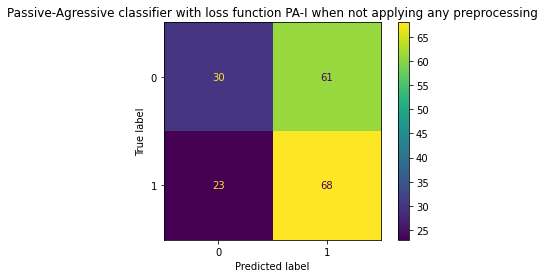

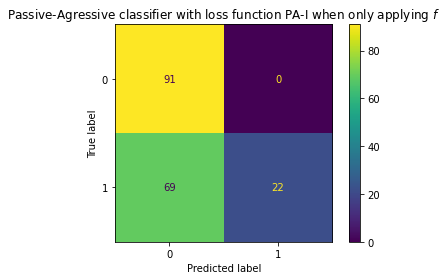

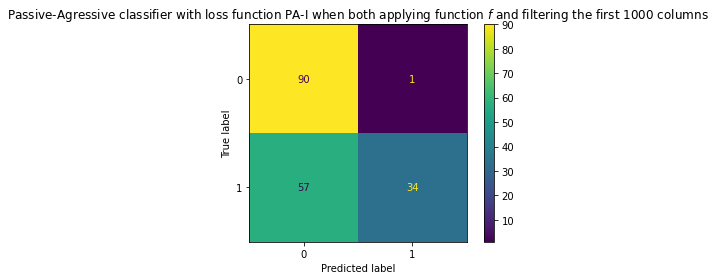

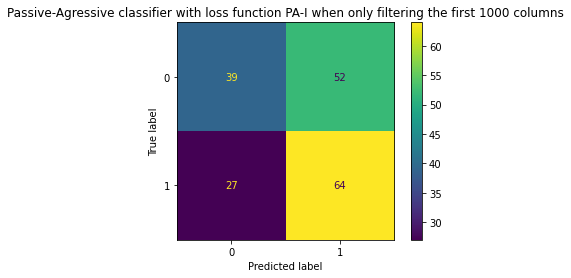

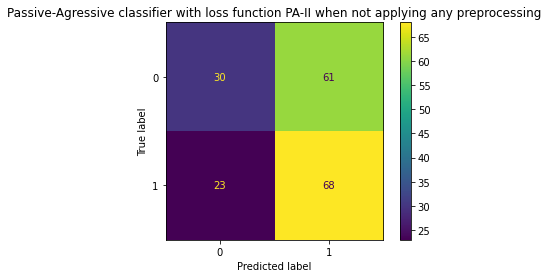

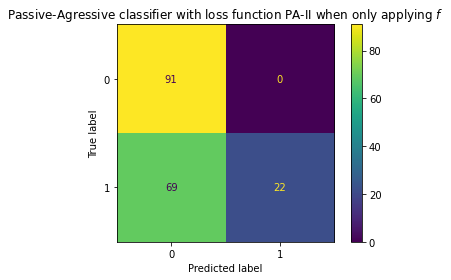

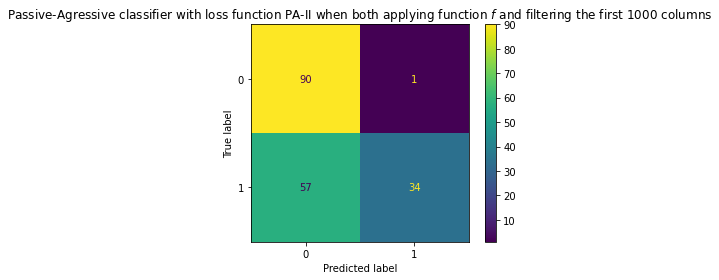

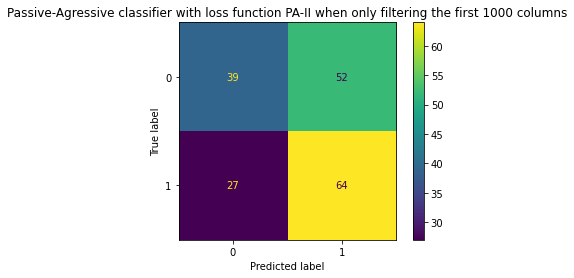

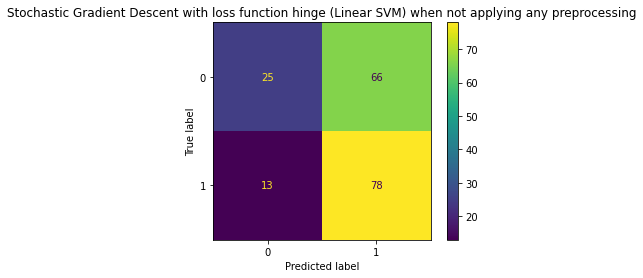

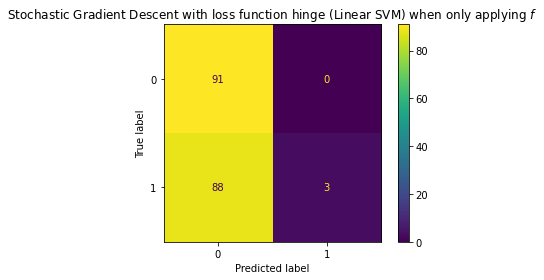

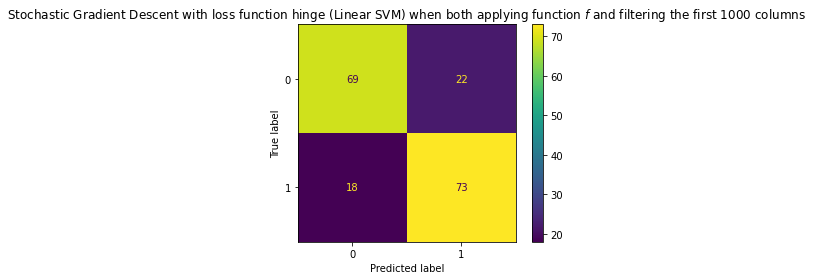

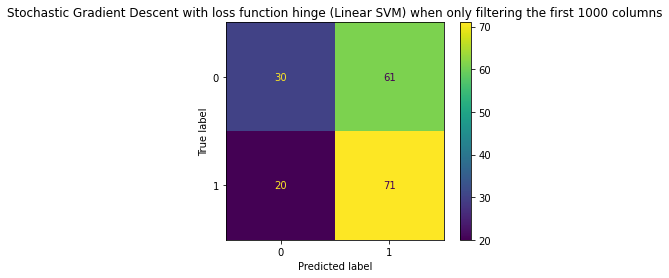

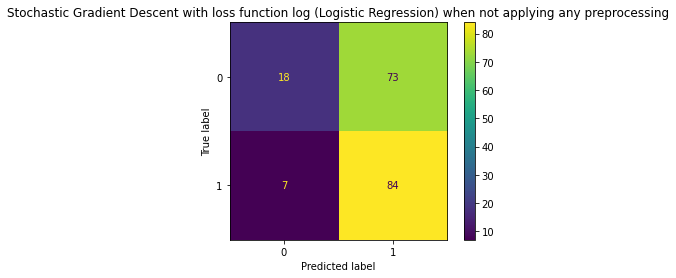

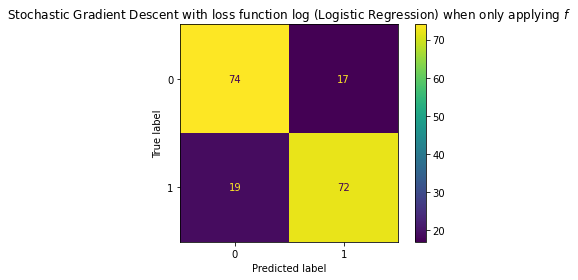

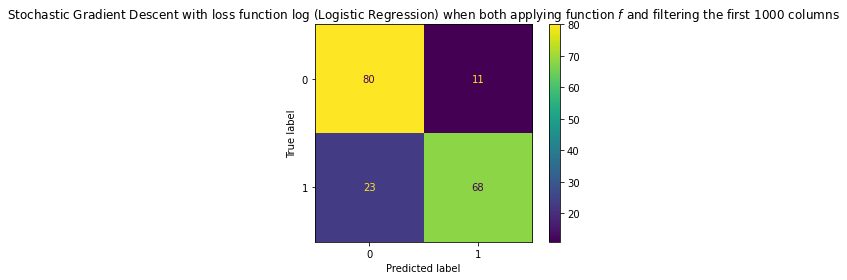

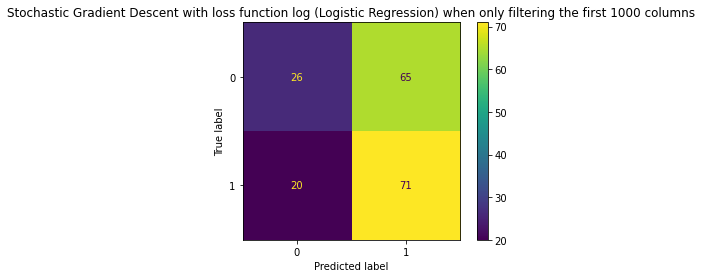

In [33]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
for classifier_name, results in classifier_scores.items():
    ConfusionMatrixDisplay.from_predictions(np.array(results)[:, 1], np.array(results)[:, 0])
    plt.title(get_name(classifier_name))
    plt.show()

In [31]:
classifier_scores

{'pa1_identity': [(0, 0),
  (1, 1),
  (0, 0),
  (1, 1),
  (0, 0),
  (1, 1),
  (1, 1),
  (1, 0),
  (1, 1),
  (1, 1),
  (0, 0),
  (1, 0),
  (0, 0),
  (1, 0),
  (1, 1),
  (0, 0),
  (1, 1),
  (0, 1),
  (1, 1),
  (1, 0),
  (1, 0),
  (1, 1),
  (0, 1),
  (1, 1),
  (0, 0),
  (1, 1),
  (1, 1),
  (1, 0),
  (1, 1),
  (0, 1),
  (0, 0),
  (1, 0),
  (1, 1),
  (1, 1),
  (1, 1),
  (0, 0),
  (0, 1),
  (1, 0),
  (1, 0),
  (1, 0),
  (0, 0),
  (0, 0),
  (0, 1),
  (0, 1),
  (1, 1),
  (1, 1),
  (1, 1),
  (0, 0),
  (1, 0),
  (1, 1),
  (1, 1),
  (0, 0),
  (0, 0),
  (0, 0),
  (1, 1),
  (0, 1),
  (0, 0),
  (1, 0),
  (1, 0),
  (1, 0),
  (0, 1),
  (1, 0),
  (1, 1),
  (1, 1),
  (1, 0),
  (1, 0),
  (1, 0),
  (1, 1),
  (1, 1),
  (1, 0),
  (1, 1),
  (1, 0),
  (1, 0),
  (1, 0),
  (0, 0),
  (1, 0),
  (0, 1),
  (1, 1),
  (1, 0),
  (1, 0),
  (1, 1),
  (1, 0),
  (0, 1),
  (0, 0),
  (0, 1),
  (1, 0),
  (0, 1),
  (1, 0),
  (0, 1),
  (1, 0),
  (1, 0),
  (1, 1),
  (1, 0),
  (1, 0),
  (1, 0),
  (0, 1),
  (0, 0),
  (1, 1),
  (1